In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
import seaborn
pylab.style.use('seaborn')
import pandas as pd
from pylab import rcParams

## Modeling of oscillations of a chain mass–spring system

In [1]:
%%time
num = 500
u0 = 1.
C = 1.
dt = 0.1
m = 1.
a = 3000

# Цикл по реализациям
R = 50
E_k = np.zeros([a, num+1])
E_p = np.zeros([a, num+1])
E_p_ = np.zeros([a, num+1])

for r in range (R):

    t = 3000
    u = np.zeros([t, num+1])
    v = np.zeros([t, num+1])
    Ek = np.zeros([t, num+1])
    vz_u = np.zeros([t, num+1])

    Ep = np.zeros([t, num+1])
    Ep_ = np.zeros([t, num+1])
    EP_ = np.zeros([t, num+1])

    # Задаем начальные скорости из нормального распределения
    mu, sigma = 0, 0.01 # среднее и СКО
    v0 = np.random.normal(mu, sigma, size = num+1)
    v0_mean = np.mean(v0)
    #print("Средняя скорость системы в начальный момент времени:", v0_mean)
    v[0,:] = v0 - v0_mean
    v[0, 0] = v[0, num-1]
    v[0, num] = v[0, 1]
    
    # Цикл по времени
    for t in range(1, (int(t))):
        v[t,:] = v[t-1,:]
        u[t,:] = u[t-1,:]
            
    # Замыкаем начальные условия
        u[t, 0] = u[t, num-1]
        u[t, num] = u[t,1]
        v[t, 0] = v[t, num-1]
        v[t, num] = v[t,1]

        #Циклы по номерам частиц
        for i in range(1, (len(u[0])-1)):   
            v[t, i] = v[t, i] + (u[t, i+1]- 2*u[t, i] + u[t, i-1])*dt

        for i in range(1, (len(u[0])-1)):
            u[t, i] = u[t, i] + v[t, i]*dt
            
    # Полная кинетичечкая энергия системы для каждого момента времени:
        Ek[t] = np.mean((v[t]**2)*m/2)
        for i in range(1, (len(u[0])-1)):
            vz_u[t, i] = (u[t, i] - u[t, i-1])
        Ep[t] = np.mean((vz_u[t]**2)*C/2)
  
    E_k = E_k + Ek
    E_p = E_p + Ep

E_k = E_k/R/num
E_p = E_p/R/num

CPU times: user 6min 33s, sys: 2.24 s, total: 6min 36s
Wall time: 3min 24s


Text(0, 0.5, 'Ek')

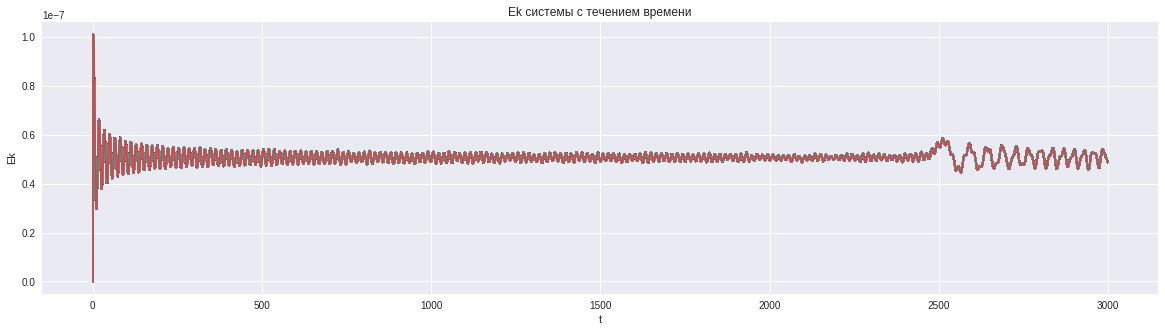

In [4]:
rcParams['figure.figsize'] = 20, 5
pylab.plot(E_k)
title = str(('Ek системы с течением времени'))
pylab.title(title)
pylab.title(title)
pylab.xlabel('t')
pylab.ylabel('Ek')

Text(0, 0.5, 'Ep')

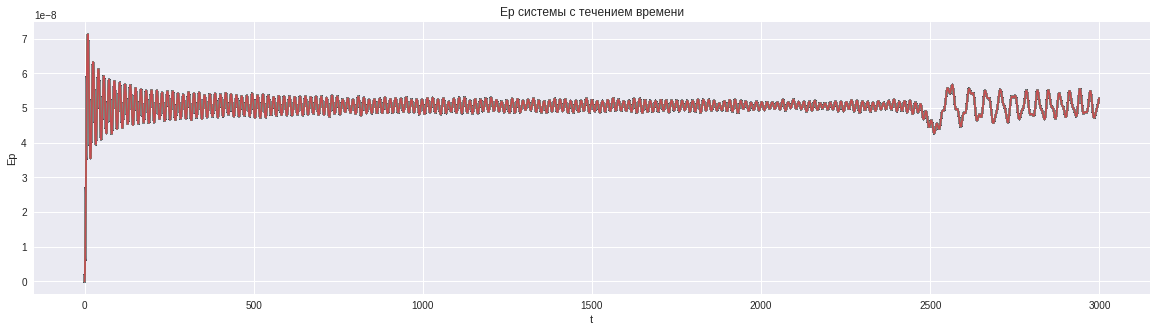

In [5]:
rcParams['figure.figsize'] = 20, 5
pylab.plot(E_p)
title = str(('Ep системы с течением времени'))
pylab.title(title)
pylab.xlabel('t')
pylab.ylabel('Ep')

Text(0, 0.5, 'Полная энергия Ep + Ek')

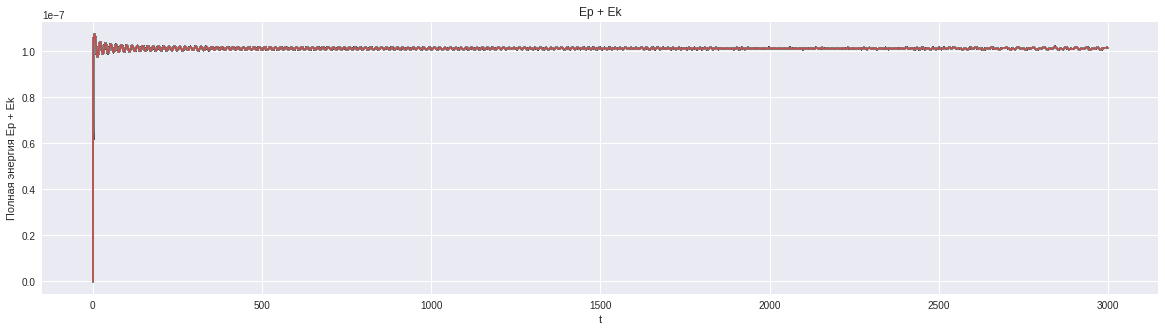

In [6]:
rcParams['figure.figsize'] = 20, 5
pylab.plot(E_p+E_k)
title = str(('Ep + Ek'))
pylab.title(title)
pylab.xlabel('t')
pylab.ylabel('Полная энергия Ep + Ek')

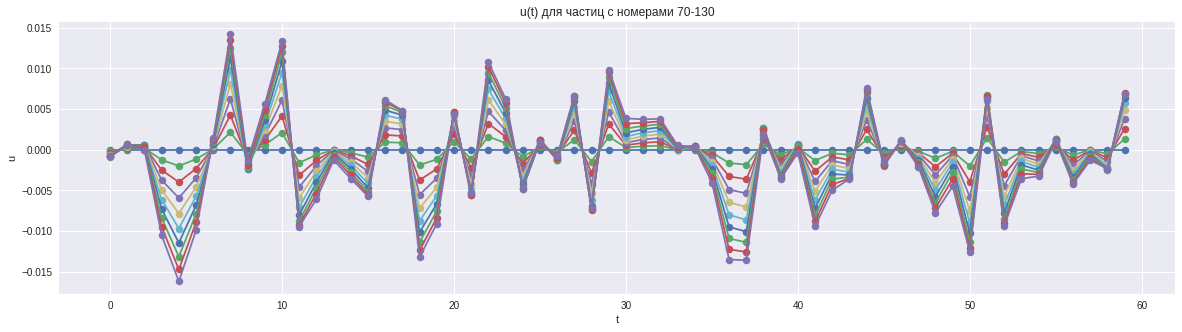

In [7]:
# Перемещения частиц на интервале t = [0, 10] для частиц 70-130
for t in range(0, 10):
    pylab.plot(u[t,70:130], marker = '.', markersize = 15)
    title = ('u(t) для частиц с номерами 70-130')
    pylab.title(title)
    pylab.xlabel('t')
    pylab.ylabel('u')